In [1]:
import pandas as pd #Data frame,Series
import numpy as np #Scientific computing package -Array

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io
from scipy import misc
import imageio

%matplotlib inline

# Spotify Song Attribute EDA

-Import Dataset

-EDA to Visualize data and observe sturcture

-Train a classifier(Decision Tree)

-Predict target using the trained classifier

In [2]:
data = pd.read_csv('/home/chetan/Downloads/data.csv')

In [3]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [4]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [6]:
train,test = train_test_split(data,test_size = 0.15)

In [7]:
print("Training size: {};Test size:{}".format(len(train),len(test)))

Training size: 1714;Test size:303


In [8]:
train.shape

(1714, 17)

In [9]:
#Custom color Palette
red_blue = ["#19B5FE","#EF4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")

In [10]:
pos_tempo = data[data['target']== 1]['tempo']
neg_tempo = data[data['target']== 0]['tempo']

pos_dance = data[data['target']== 1]['danceability']
neg_dance = data[data['target']== 0]['danceability']

pos_duration = data[data['target']== 1]['duration_ms']
neg_duration = data[data['target']== 0]['duration_ms']

pos_energy = data[data['target']== 1]['energy']
neg_energy = data[data['target']== 0]['energy']

pos_loudness = data[data['target']==1]['loudness']
neg_loudness = data[data['target']==0]['loudness']

pos_speechiness = data[data['target'] == 1]['speechiness']
neg_speechiness = data[data['target'] == 0]['speechiness']

pos_valence = data[data['target'] == 1]['valence']
neg_valence = data[data['target'] == 0]['valence']

pos_key = data[data['target']== 1]['key']
neg_key = data[data['target']== 0]['key']

pos_acousticness = data[data['target'] ==1]['acousticness']
neg_acousticness = data[data['target'] ==0]['acousticness']

pos_instrumentalness =data[data['target'] == 1]['instrumentalness']
neg_instrumentalness =data[data['target'] == 0]['instrumentalness']

In [11]:
pos_tempo

0       150.062
1       160.083
2        75.044
3        86.468
4       174.004
         ...   
1015    139.997
1016     86.733
1017    140.008
1018    147.072
1019    107.039
Name: tempo, Length: 1020, dtype: float64

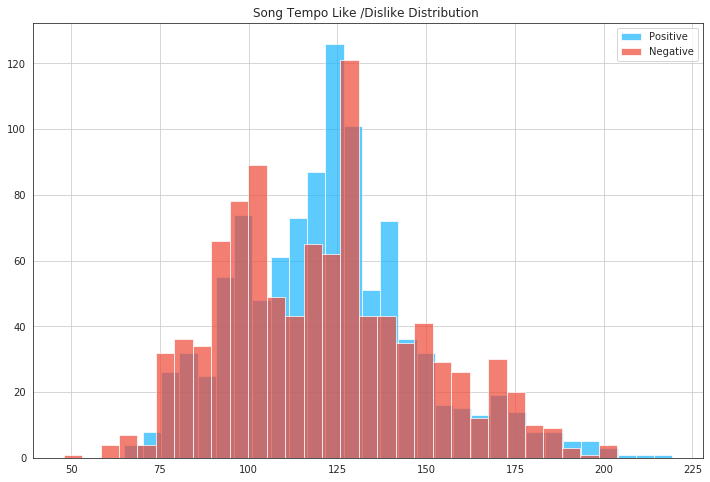

In [12]:
fig = plt.figure(figsize=(12,8))

plt.title("Song Tempo Like /Dislike Distribution ")

pos_tempo.hist(alpha = 0.7,bins = 30, label= 'Positive')
neg_tempo.hist(alpha = 0.7,bins = 30, label= 'Negative')

plt.legend(loc = "upper right")

/home/chetan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/home/chetan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/chetan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the 

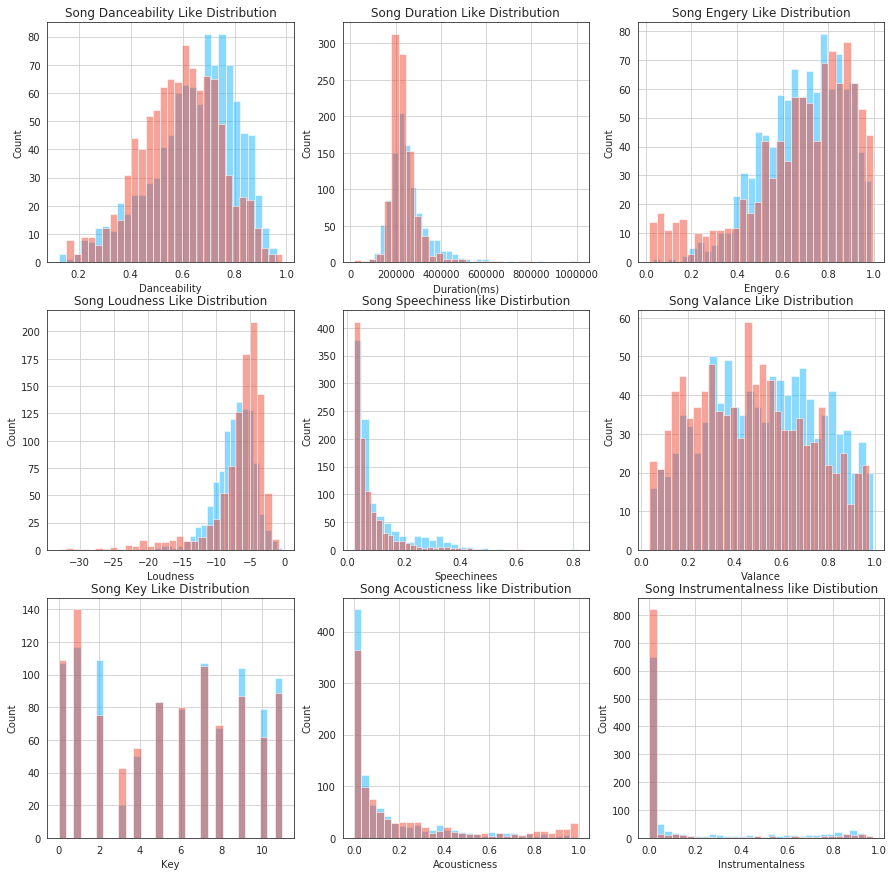

In [13]:
fig2 = plt.figure(figsize=(15,15))
#fig3 = plt.figure(figsize=(15,15))
#Danceability
ax3 = fig2.add_subplot(331)

ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Danceability Like Distribution')
pos_dance.hist(alpha=0.5,bins=30)

ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha=0.5,bins=30)

#Duration
ax5 = fig2.add_subplot(332)

ax5.set_xlabel('Duration(ms)')
ax5.set_ylabel('Count')
ax5.set_title('Song Duration Like Distribution')
pos_duration.hist(alpha=0.5,bins=30)

ax6 = fig2.add_subplot(332)
neg_duration.hist(alpha=0.5,bins=30)

#Engery
ax7 = fig2.add_subplot(333)

ax7.set_xlabel('Engery')
ax7.set_ylabel('Count')
ax7.set_title('Song Engery Like Distribution')
pos_energy.hist(alpha=0.5,bins=30)

ax8 = fig2.add_subplot(333)
neg_energy.hist(alpha=0.5,bins=30)

#Loudness
ax9 = fig2.add_subplot(334)
pos_loudness.hist(alpha=0.5,bins=30)
ax9.set_xlabel('Loudness')
ax9.set_ylabel('Count')
ax9.set_title('Song Loudness Like Distribution')


ax10 = fig2.add_subplot(334)
neg_loudness.hist(alpha=0.5,bins=30)

#Speechiness

ax11 = fig2.add_subplot(335)

pos_speechiness.hist(alpha=0.5,bins=30)
ax11.set_xlabel('Speechinees')
ax11.set_ylabel('Count')
ax11.set_title('Song Speechiness like Distirbution')

ax12 =fig2.add_subplot(335)
neg_speechiness.hist(alpha=0.5,bins=30)

#Valance

ax13 = fig2.add_subplot(336)

pos_valence.hist(alpha=0.5,bins=30)

ax13.set_xlabel('Valance')
ax13.set_ylabel('Count')
ax13.set_title('Song Valance Like Distribution')

ax14=fig2.add_subplot(336)
neg_valence.hist(alpha=0.5,bins=30)

#key

ax15 =fig2.add_subplot(337)

pos_key.hist(alpha=0.5,bins=30)

ax15.set_xlabel('Key')
ax15.set_ylabel('Count')
ax15.set_title('Song Key Like Distribution')

ax16 =fig2.add_subplot(337)
neg_key.hist(alpha=0.5,bins=30)

#Acousticness
ax17 = fig2.add_subplot(338)

pos_acousticness.hist(alpha=0.5,bins=30)
ax17.set_xlabel('Acousticness')
ax17.set_ylabel('Count')
ax17.set_title('Song Acousticness like Distribution')

ax18 =fig2.add_subplot(338)
neg_acousticness.hist(alpha=0.5,bins=30)

#Instrumentalness

ax19 = fig2.add_subplot(339)

pos_instrumentalness.hist(alpha=0.5,bins=30)
ax19.set_xlabel('Instrumentalness')
ax19.set_ylabel('Count')
ax19.set_title('Song Instrumentalness like Distibution')

ax20 = fig2.add_subplot(339)
neg_instrumentalness.hist(alpha=0.5,bins=30)



In [14]:
c = DecisionTreeClassifier(min_samples_split=100)

In [15]:
features = ['danceability','duration_ms','energy','loudness','speechiness','valence','key','acousticness','instrumentalness']

In [16]:
x_train = train[features]
y_train = train['target']

x_test = test[features]
y_test =  test['target']

In [17]:
dt =c.fit(x_train,y_train)

In [18]:
def show_tree(tree,features,path):
    f= io.StringIO()
    export_graphviz(tree,out_file = f,feature_names = features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imageio.imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)
    

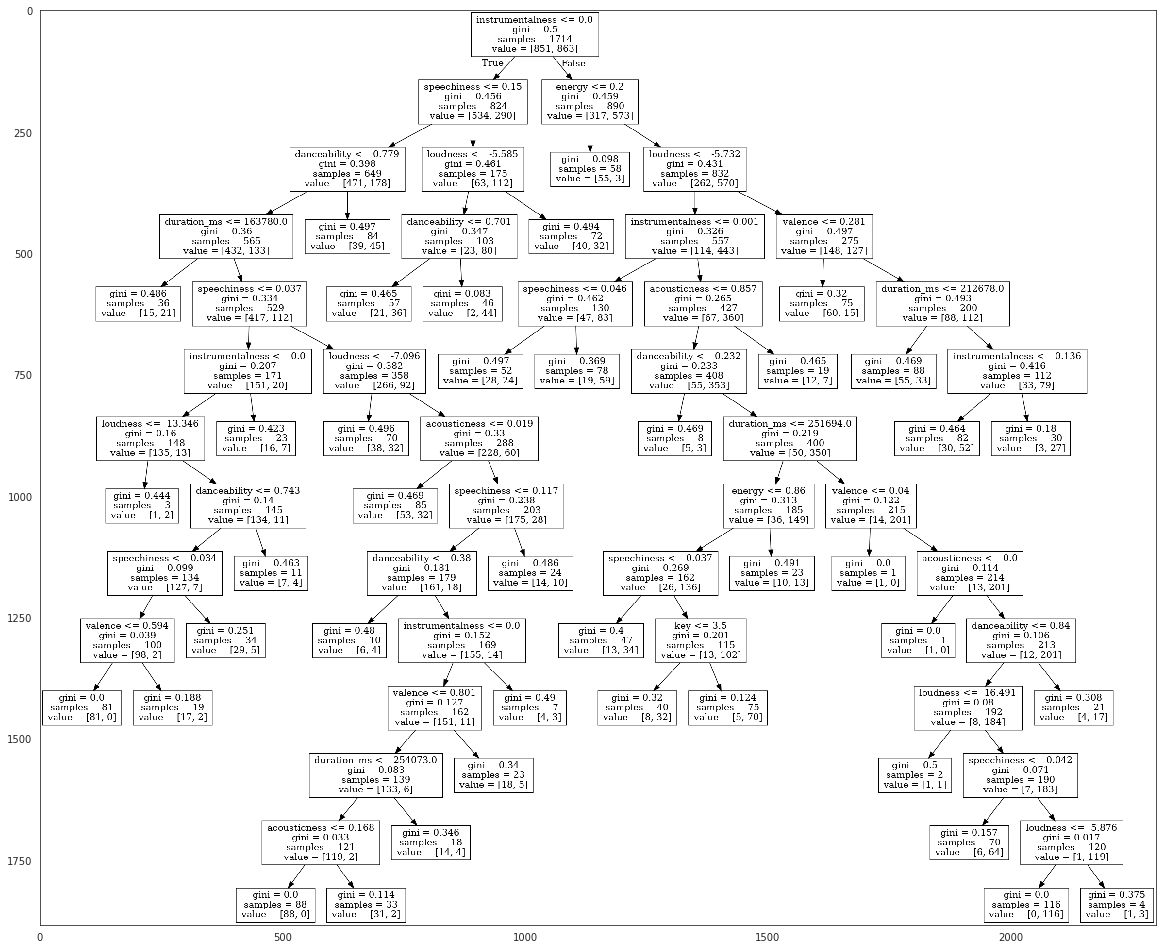

In [19]:
show_tree(dt,features,'dec_tree_01.png')

In [20]:
y_pred = c.predict(x_test)

In [21]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,

In [27]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test,y_pred)*100

In [28]:
print("Accuracy Using Decision Tree :",round(score,1),"%")

Accuracy Using Decision Tree : 71.0 %
